In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [262]:
# 读取 CSV 文件
df = pd.read_csv('train.csv')

# 查看数据
print(df.head())

         date symbol       open      close    low       high      volume
0  2010-01-04   SYMC  18.040001  18.400000  18.01  18.530001   8322300.0
1  2010-01-04    IFF  41.509998  42.009998  41.50  42.020000    286000.0
2  2010-01-04   ILMN  31.120001  30.549999  30.42  31.230000   1793700.0
3  2010-01-04   INTC  20.790001  20.879999  20.73  21.030001  47800900.0
4  2010-01-04   INTU  31.090000  30.809999  30.77  31.150000   2353000.0


In [263]:
# 转换日期格式
df['date'] = pd.to_datetime(df['date'])

# 设置日期为索引
df.set_index('date', inplace=True)

# 选择特定股票进行预测（例如 SYMC）
stock_symbol = 'SYMC'
stock_data = df[df['symbol'] == stock_symbol]#[['close']]
stock_data = stock_data[['open', 'high', 'low', 'close']]
# stock_data = stock_data.asfreq('D')  # 设置每日频率
# stock_data = stock_data.resample('D').ohlc()
# stock_data = stock_data.dropna()     # 确保无缺失值

# 提取收盘价
stock_data = stock_data[['close']]

# 查看数据
print(stock_data.head())

                close
date                 
2010-01-04  18.400000
2010-01-05  18.299999
2010-01-06  18.360001
2010-01-07  18.320000
2010-01-08  18.370001


In [264]:
# 划分训练集和测试集
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[0:train_size], stock_data[train_size:]

print(f"训练集大小: {len(train)}")
print(f"测试集大小: {len(test)}")

训练集大小: 1136
测试集大小: 285


In [265]:
# 训练 ARIMA 模型
model = ARIMA(train, order=(1, 1, 1),seasonal_order=(1,1,1,12))  # (p, d, q)
model_fit = model.fit()

# 模型摘要
print(model_fit.summary())

c:\Users\25117\Downloads\Program_Files\anaconda3\envs\testenv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\25117\Downloads\Program_Files\anaconda3\envs\testenv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\25117\Downloads\Program_Files\anaconda3\envs\testenv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                            close   No. Observations:                 1136
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -406.463
Date:                          Thu, 10 Jul 2025   AIC                            822.926
Time:                                  16:46:25   BIC                            848.045
Sample:                                       0   HQIC                           832.419
                                         - 1136                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1179      0.518     -0.228      0.820      -1.132       0.896
ma.L1          0.0628      0.520      0.121      0.

c:\Users\25117\Downloads\Program_Files\anaconda3\envs\testenv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\25117\Downloads\Program_Files\anaconda3\envs\testenv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


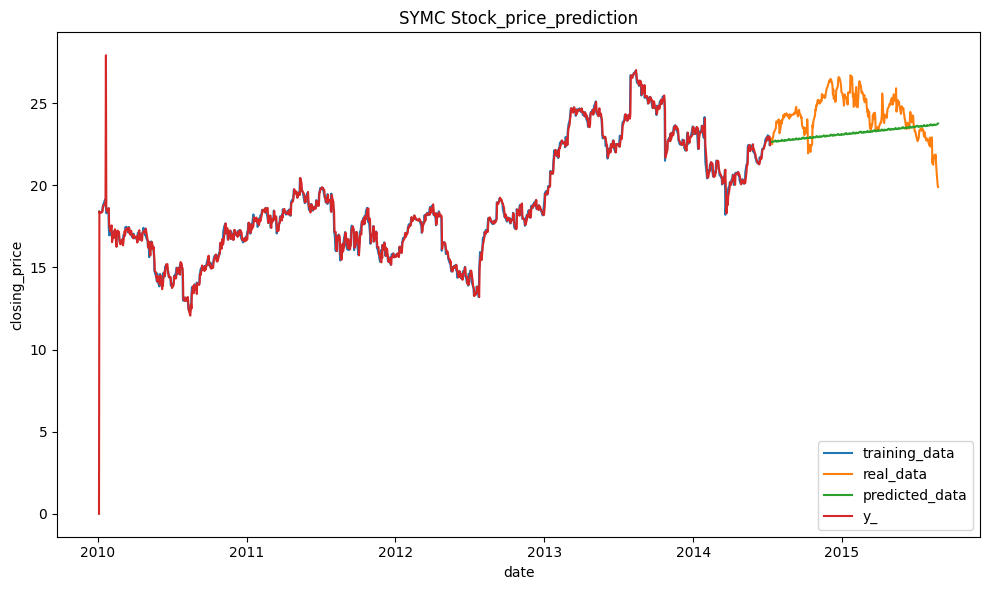

RMSE: 1.7152816383321334


1136    22.614119
1137    22.669887
1138    22.631800
1139    22.636644
1140    22.653640
          ...    
1416    23.684708
1417    23.674007
1418    23.688047
1419    23.732558
1420    23.753895
Name: predicted_mean, Length: 285, dtype: float64

In [ ]:
# 进行预测
forecast = model_fit.forecast(steps=len(test))
# Predict on the training set
y_ = model_fit.predict(start=train.index[0], end=train.index[-1])
# 将预测结果转换为 DataFrame
# forecast_df = pd.DataFrame(forecast, index=test.index, columns=['forecast'])
forecast_df=forecast.to_frame(name='forecast')
forecast_df.index = test.index
# y_ = y_.to_frame(name='y_')
# y_.index = train.index
# '''
# 绘制预测结果
plt.figure(figsize=(10, 6))
plt.plot(train, label='training_data')
plt.plot(test, label='real_data')
plt.plot(forecast_df, label='predicted_data')
# plt.plot(y_, label='y_')
plt.title(f'{stock_symbol} Stock_price_prediction')
plt.xlabel('date')
plt.ylabel('closing_price')
plt.legend()
plt.tight_layout()
plt.show()

# 计算 RMSE（均方根误差）
rmse = sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")
#''';
# forecast